In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV


In [23]:
df= pd.read_csv("stage2.csv",index_col=0)

In [3]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.861703,4413.062005,60.0,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.861703,4413.062005,60.0,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.861703,179.426579,60.0,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0


In [24]:
grouped = df.drop('Year',axis=1).groupby(by='Entity').mean()

In [25]:
grouped.to_csv('grouped.csv')

In [26]:
Top_80_percent= list(grouped.sort_values(by='Value_co2_emissions_kt_by_country',ascending=False).index[:15])

In [27]:
Top_80_percent

['China',
 'United States',
 'India',
 'Japan',
 'Germany',
 'Canada',
 'United Kingdom',
 'Mexico',
 'Indonesia',
 'Saudi Arabia',
 'Italy',
 'South Africa',
 'Brazil',
 'Australia',
 'France']

In [28]:
high= df[df['Entity'].isin(Top_80_percent)]
low= df[~df['Entity'].isin(Top_80_percent)]

In [29]:
high_2009= high[high['Year']==2009].drop(['Year','Entity'],axis=1)
low_2009=low[low['Year']==2009].drop(['Year','Entity'],axis=1)
high=high[high['Year']!=2009].drop(['Year','Entity'],axis=1)
low=low[low['Year']!=2009].drop(['Year','Entity'],axis=1)

In [30]:
high.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,2.850000e+02,285.000000,285.000000,285.0000,2.850000e+02
mean,96.417382,85.781053,15.835158,637.143474,123.010316,191.030386,34.187040,43623.059559,5.063088,1.385851e+06,3.211044,24889.248669,144.0000,3.874723e+06
std,8.156598,23.660987,13.445558,1001.220098,212.879542,284.190571,27.877032,30817.024856,1.991066,2.185871e+06,2.713695,18722.225922,135.1427,3.844898e+06
min,55.800000,6.100000,0.010000,28.870000,0.000000,0.000000,0.000000,3469.836400,2.300000,2.496600e+05,-3.545763,443.314194,3.0000,2.436100e+05
25%,98.125380,82.650000,6.850000,155.560000,0.000000,32.110000,16.313873,18335.252000,3.680000,3.799600e+05,1.483969,7005.095413,25.0000,3.779440e+05
50%,100.000000,100.000000,10.600000,222.640000,17.630000,82.960000,23.308966,39540.008000,4.480000,4.815100e+05,2.630532,24177.335560,119.0000,1.964375e+06
75%,100.000000,100.000000,21.880000,564.950000,97.290000,291.410000,39.810013,65480.074000,5.840000,1.081570e+06,4.554560,41001.142980,240.0000,8.515770e+06
max,100.000000,100.000000,47.570000,5098.220000,809.410000,2014.570000,93.698230,119158.600000,10.850000,1.070722e+07,14.230861,68156.627920,464.0000,9.984670e+06


In [31]:
low.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.00000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2.774000e+03
mean,76.160475,61.392772,35.495613,15.065811,2.70690,7.309618,37.516084,24682.472360,5.503446,34143.983929,4.147019,11493.605014,236.015501,3.213705e+05
std,31.739507,39.834698,30.792252,28.317735,11.30115,16.780750,34.953805,36044.773315,3.710168,58144.651184,5.310207,18743.544568,741.826249,5.071088e+05
min,1.252269,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.030000,10.000000,-62.075920,111.927225,2.000000,2.100000e+01
25%,51.976085,18.775000,7.085000,0.240000,0.00000,0.040000,1.887684,2556.353900,3.260000,1642.499994,2.087182,1217.610680,30.000000,2.571300e+04
50%,96.800000,80.350000,28.640000,2.310000,0.00000,1.185000,31.656459,11355.407000,4.470000,7835.000039,3.861703,4139.183832,83.000000,1.088890e+05
75%,100.000000,100.000000,61.700000,17.370000,0.00000,6.787500,65.059595,30516.844500,6.180000,42970.000267,6.013075,12010.087803,211.250000,4.383170e+05
max,100.000000,100.000000,96.040000,189.550000,92.54000,145.480000,100.000010,262585.700000,32.570000,354679.992700,123.139555,123514.196700,8358.000000,2.780400e+06


In [43]:
# low.to_csv('low.csv')

<AxesSubplot:>

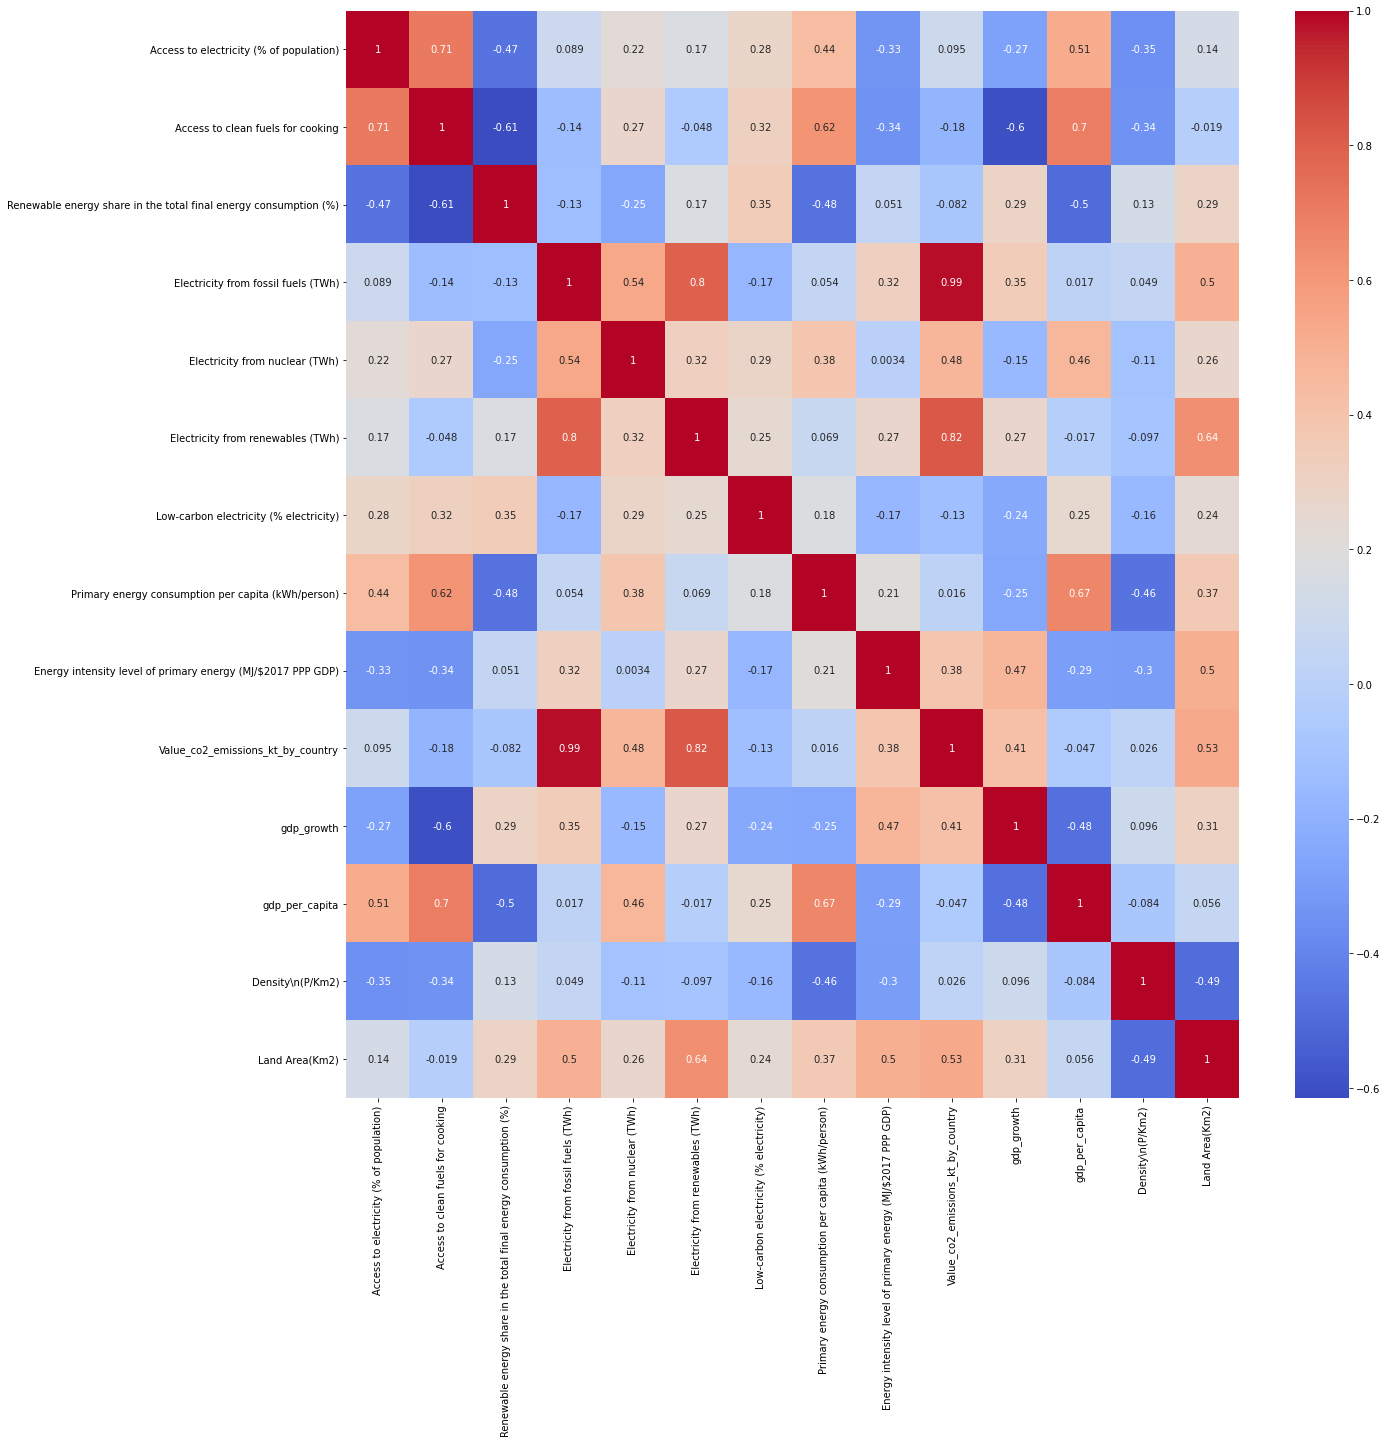

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(high.corr(),annot= True,cmap='coolwarm')
# plt.savefig('high.jpeg')

<AxesSubplot:>

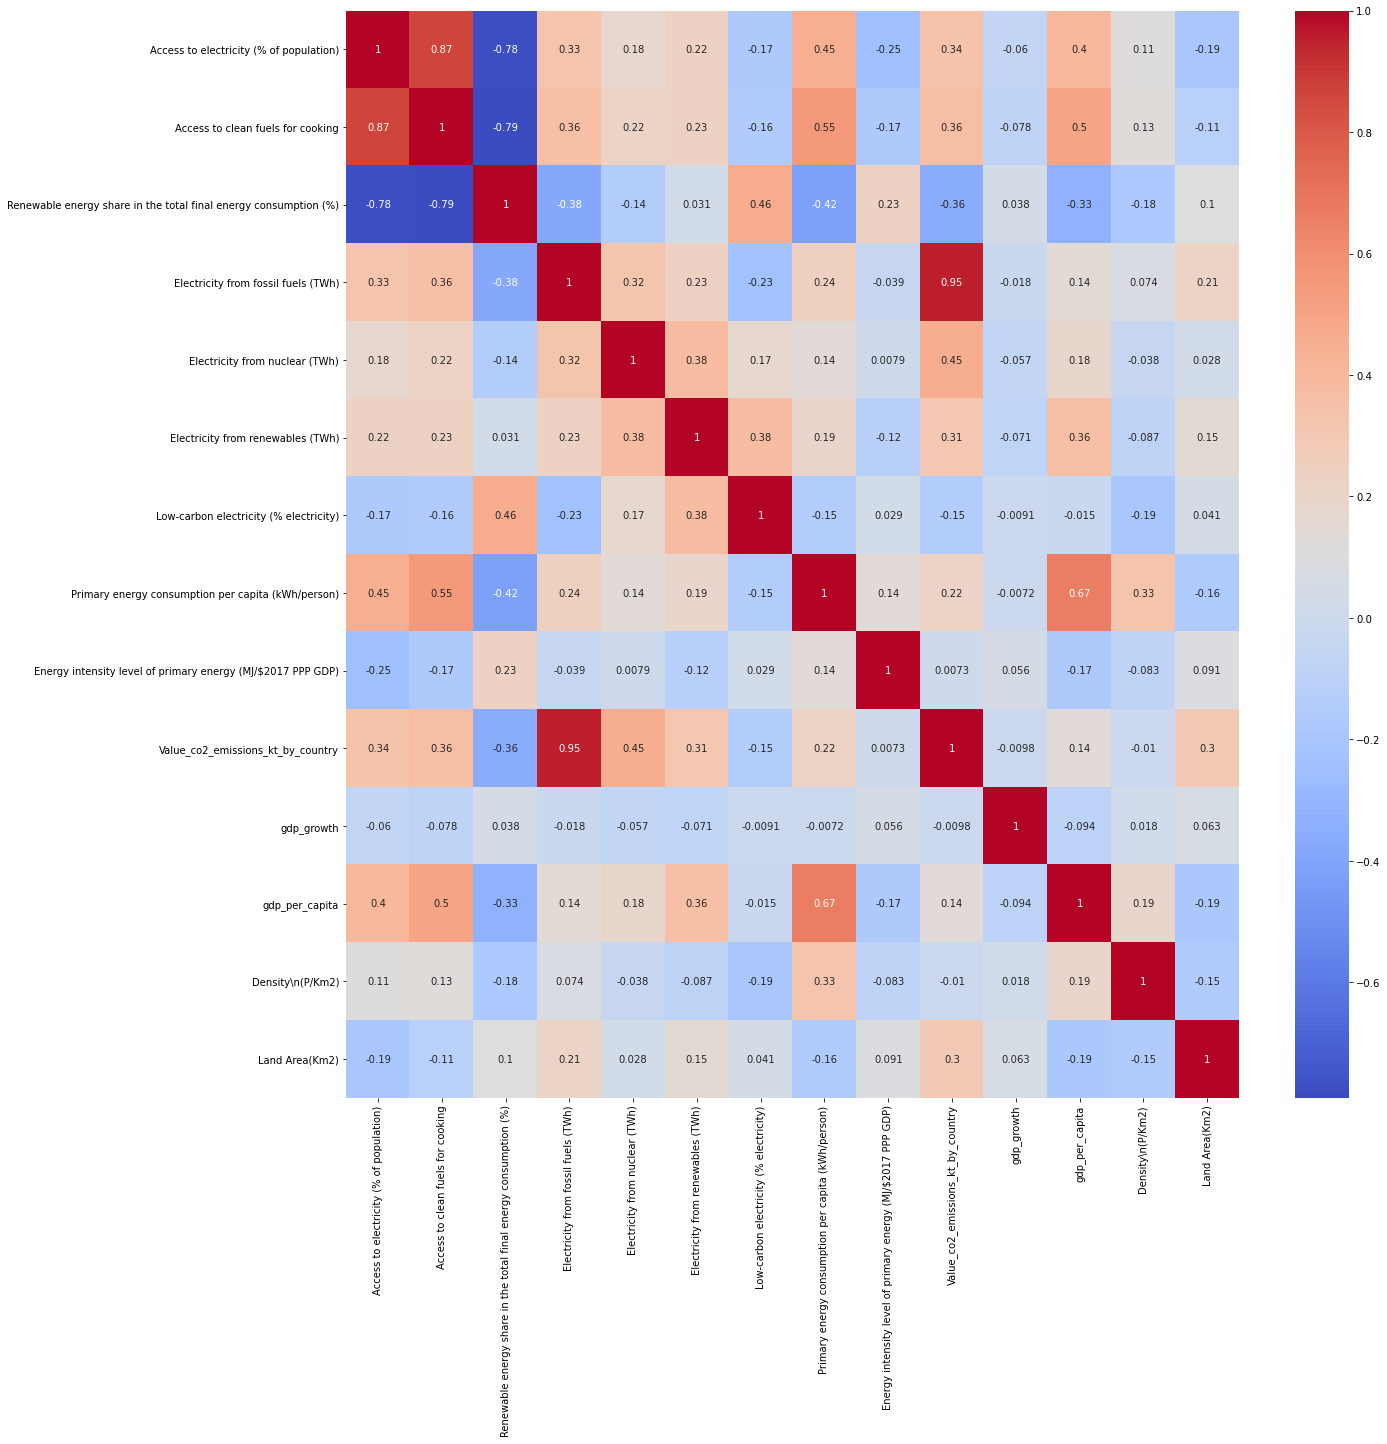

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(low.corr(),annot= True,cmap='coolwarm')
# plt.savefig("low.jpeg")


['Access to clean fuels for cooking',
 'Electricity from fossil fuels (TWh)',
 'Low-carbon electricity (% electricity)',
 'gdp_growth']

In [37]:
X= high.drop("Value_co2_emissions_kt_by_country",axis=1)
y= high['Value_co2_emissions_kt_by_country']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [39]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
grid_search= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=1,refit=True,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_dep

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [41]:
predictions= grid_search.predict(X_test)

In [42]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 100170.22372799784
r2 score 0.9897082595708945
mean squared error 61802809823.64997
root mean square error 248601.7092130502
mean absoute percentage error 0.056832973432614425


In [44]:
best_estimator= grid_search.best_estimator_

In [45]:
features= best_estimator.feature_importances_

In [49]:
feature_n= features.argsort()[::-1]

In [82]:
feature_name= {}
for i in range(len(X_train.columns)):
    feature_name[i]=X_train.columns[i]
feature_name

{0: 'Access to electricity (% of population)',
 1: 'Access to clean fuels for cooking',
 2: 'Renewable energy share in the total final energy consumption (%)',
 3: 'Electricity from fossil fuels (TWh)',
 4: 'Electricity from nuclear (TWh)',
 5: 'Electricity from renewables (TWh)',
 6: 'Low-carbon electricity (% electricity)',
 7: 'Primary energy consumption per capita (kWh/person)',
 8: 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 9: 'gdp_growth',
 10: 'gdp_per_capita',
 11: 'Density\\n(P/Km2)',
 12: 'Land Area(Km2)'}

In [52]:
for i in feature_n:
    print(feature_n[i])

Access to electricity (% of population)
Access to clean fuels for cooking
Renewable energy share in the total final energy consumption (%)
Electricity from fossil fuels (TWh)
Electricity from nuclear (TWh)
Electricity from renewables (TWh)
Low-carbon electricity (% electricity)
Primary energy consumption per capita (kWh/person)
Energy intensity level of primary energy (MJ/$2017 PPP GDP)
gdp_growth
gdp_per_capita
Density\n(P/Km2)
Land Area(Km2)


In [65]:
l= [1,3,4,7,8,9,11,13]
feat= []
for i in l:
    feat.append(high.columns[i-1])
feat

['Access to electricity (% of population)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'Density\\n(P/Km2)']

In [66]:
X_train= X_train[feat]
X_test= X_test[feat]

In [67]:
grid_search3= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=1,refit=True,verbose=2)
grid_search3.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_dep

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total t

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [68]:
predictions= grid_search3.predict(X_test)

In [69]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 86812.65332746496
r2 score 0.9908907093664537
mean squared error 54702094415.56445
root mean square error 233884.78876481997
mean absoute percentage error 0.058079822299328294


In [71]:
X= low.drop("Value_co2_emissions_kt_by_country",axis=1)
y= low['Value_co2_emissions_kt_by_country']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [73]:
grid_search4= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=1,refit=True,verbose=2)
grid_search4.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_dep

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [74]:
predictions= grid_search4.predict(X_test)

In [75]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1805.253227682517
r2 score 0.9954172955377479
mean squared error 15041404.440675193
root mean square error 3878.324952950074
mean absoute percentage error 0.19229774064029223


In [77]:
best_estimator= grid_search.best_estimator_

In [78]:
features= best_estimator.feature_importances_

In [79]:
feature_n= features.argsort()[::-1]

In [83]:
for i in feature_n:
    print(feature_name[i])

Electricity from fossil fuels (TWh)
Electricity from renewables (TWh)
Renewable energy share in the total final energy consumption (%)
gdp_growth
Density\n(P/Km2)
Energy intensity level of primary energy (MJ/$2017 PPP GDP)
Low-carbon electricity (% electricity)
Primary energy consumption per capita (kWh/person)
gdp_per_capita
Land Area(Km2)
Access to electricity (% of population)
Access to clean fuels for cooking
Electricity from nuclear (TWh)


In [91]:
l= [3,4,6,7,8,9,11,13]
feat= []
for i in l:
    feat.append(high.columns[i-1])
feat=['Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth']

In [92]:
X_train= X_train[feat]
X_test= X_test[feat]

In [93]:
grid_search5= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=1,refit=True,verbose=2)
grid_search5.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_dep

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [89]:
predictions= grid_search5.predict(X_test)

In [149]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 2052.0738179508708
r2 score 0.9948383823811019
mean squared error 16941519.753994357
root mean square error 4116.007744647033
mean absoute percentage error 0.2632002076640282
